# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [32]:
import numpy as np
from scipy import optimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve the model giving in the problemset, we use scipy.optimizer

We start by defining the utility, which consist of cinsumption, and a disutility of working.

After that we define the budget constraint, which consist of consumers, cash, the wage, and the taxes paid. In equilibrium, we know the consumer spends all its budget/ ressources on consumption.



In [42]:
#Defining variables:
m=1 #money
v=10 #v
e=0.3 #frisch
tau0=0.4 #ltax
tau1=0.1 #ttax
k=0.4 #cutoff
w=1

# Defining utility function and budget constraint:
def utility(l,c,e,v):
    # Returning utility from labour supply and consumption
    u=np.log(c)-v*(l**(1+1/e)/(1+1/e))
    return u
def budget(m,w,l,tau0,tau1,k):
    # Returning total resources in terms of wage less taxes and cash
    budget=m+w*l-w*l*tau0-tau1*max((w*l-k),0)
    return budget

# Defining a function, setting consumption equal to budget (as we know, the consumer chooses to spend entire budget.),
# Making this function return the utility, while c = m (negatively, as scipy only can minimize).
# This is what we want to optimize.
def model(l,w,e,v,tau0,tau1,k):
    c=budget(m,w,l,tau0,tau1,k)
    return -utility(l,c,e,v)

# Defining the optimizer-function, optimizing the consumer's decision function for l, given all other values in decision.
def optimizer(w,e,v,tau0,tau1,k,m):
    # Call the solver
    solve_l = optimize.minimize_scalar(
        model,method='bounded',
        bounds=(0,1),args=(w,e,v,tau0,tau1,k))

    # Making the optimizer-function create a list of the three solution-values, l, c, and u.
    # Optimal labor equals the optimized solution in the function:
    l_star = solve_l.x

    # Optimal consumption equals the budget constraint-function as we know, given the optimal l.
    c_star = budget(m,w,l_star,tau0,tau1,k)

    # Optimal utility must then be equal to the utility function given optimal l and c.
    u_star = utility(l_star,c_star,e,v)
    return [l_star,c_star,u_star]

# Draws out variables from the optimizer-list.
l_star = optimizer(w,e,v,tau0,tau1,k,m)[0]
c_star = optimizer(w,e,v,tau0,tau1,k,m)[1]
u_star = optimizer(w,e,v,tau0,tau1,k,m)[2]

def printsolution(w,e,v,tau0,tau1,k,m):
    print(f'Optimal labour supply is: {l_star:.3f}')
    print(f'Optimal consumption is: {c_star:.3f}')
    print(f'yielding a utility of: {u_star:.3f}')

printsolution(w,e,v,tau0,tau1,k,m)

Optimal labour supply is: 0.400
Optimal consumption is: 1.240
yielding a utility of: 0.172


# Question 2

bla bla

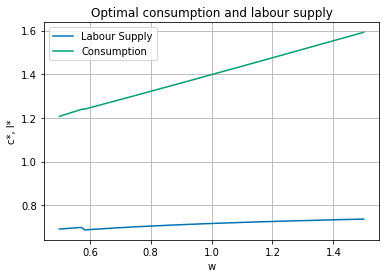

In [61]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

N = 10000
w_vec=np.linspace(0.5,1.5,N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(w_vec):
    bundle=optimizer(w,e,v,tau0,tau1,k,m)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

plt.plot(w_vec, l_vec)
plt.plot(w_vec, c_vec)
plt.grid(True)
plt.xlabel("w")
plt.ylabel("c*, l*")
plt.legend(["Labour Supply", "Consumption"])
plt.title("Optimal consumption and labour supply")
plt.show()

# Question 3

ADD ANSWER.

In [46]:
N=10000
np.random.seed(2020)
wi_vec=np.random.uniform(0.5,1.5,size=N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(wi_vec):
    bundle=optimizer(w,e,v,tau0,tau1,k,m)
    l_vec[i]=bundle[0]


tax_rev=lambda l_vec,wi_vec: tau0*wi_vec*l_vec+tau1*np.fmax(wi_vec*l_vec-k,0)
tax=tax_rev(l_vec,wi_vec)
print(tax)
np.sum(tax)

[0.27129149 0.24271908 0.15999961 ... 0.1463684  0.22402787 0.2629671 ]


1621.3496415789318

# Question 4

The Frisch elasticity of labour supply captures the elasticity of hours worked to the wage rate. Thereby measures the substitution effect of a change in the wage rate on labor supply. In the function, the elasticity appears as an inverse function, therefore we expect an increase in tax revenue from a decrease in the elasticity of labor supply.

In [47]:
e = 0.1
N=10000
np.random.seed(2020)
wi_vec=np.random.uniform(0.5,1.5,size=N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(wi_vec):
    bundle=optimizer(w,e,v,tau0,tau1,k,m)
    l_vec[i]=bundle[0]


tax_rev=lambda l_vec,wi_vec: tau0*wi_vec*l_vec+tau1*np.fmax(wi_vec*l_vec-k,0)
tax=tax_rev(l_vec,wi_vec)
print(tax)
np.sum(tax)


[0.50715955 0.46304062 0.32209523 ... 0.28946898 0.43394289 0.49434736]


3181.1600001472725

We got as expected

# Question 5

ADD ANSWER.

In [83]:
## Defines function to print results 
def print_solution2(tau0,tau1,k,tax_rev):

    """ Prints output for given input """
    
    print(f'tau0 = {tau0:.8f}')
    print(f'tau1 = {tau1:.8f}')
    print(f'k  = {k:.8f}')
    print(f'tax = {T:.8f}')

In [85]:
## Defines the negative of thw total tax revenue 
def Tax_revenue(x):

    """Returns the negative of the tax revenue calculated by the total_tax function """

    tau0 = x[0]
    tau1 = x[1]
    k   = x[2]
    return -tax_rev(e, v, m, tau0, tau1, k, N)

In [92]:
## Defines initial guesses for tau0, tau1 and k 
initial_guess = [0.5,0.5,0.5]

## Solves for the optimal tau0, tau1 and k    
sol_case2 = optimize.minimize(Tax_revenue, initial_guess, method='SLSQP', bounds=((0,1),(0,1),(0,1)))
    
tau0 = sol_case2.x[0]
tau1 = sol_case2.x[1]
k = sol_case2.x[2]
tax = tax_rev(e, v, m, tau0, tau1, k)

print_solution2(tau0,tau1,k,T)

TypeError: <lambda>() takes 2 positional arguments but 7 were given

# Conclusion

ADD CONCISE CONLUSION.